In [2]:
from Plain import Dissertation_Plain_1D

In [3]:
import numpy as np  
import matplotlib.pyplot as plt

<h2> M0 = 0.5

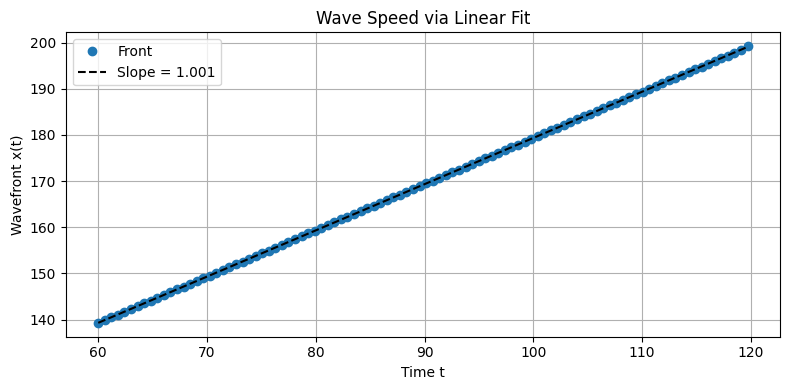

Estimated speed = 1.0007, R² = 1.0000
Estimated speed = 1.0007, R² = 1.0000


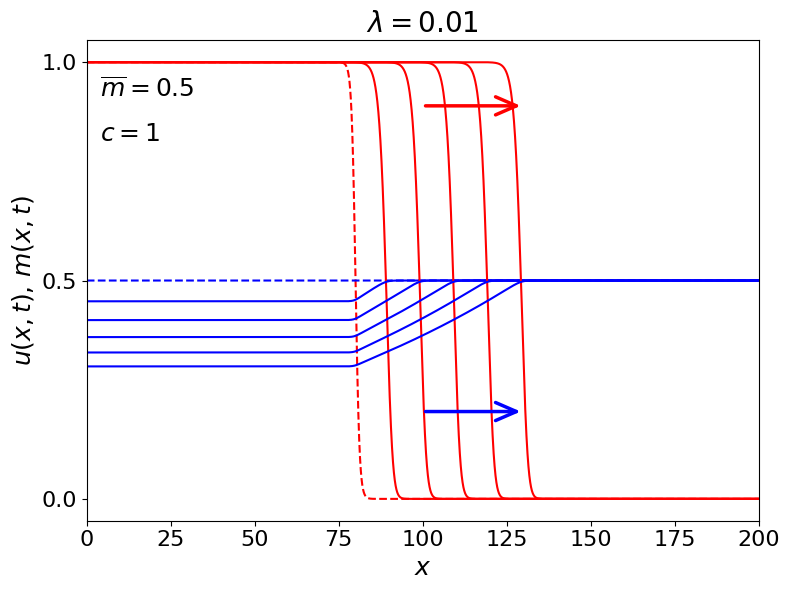

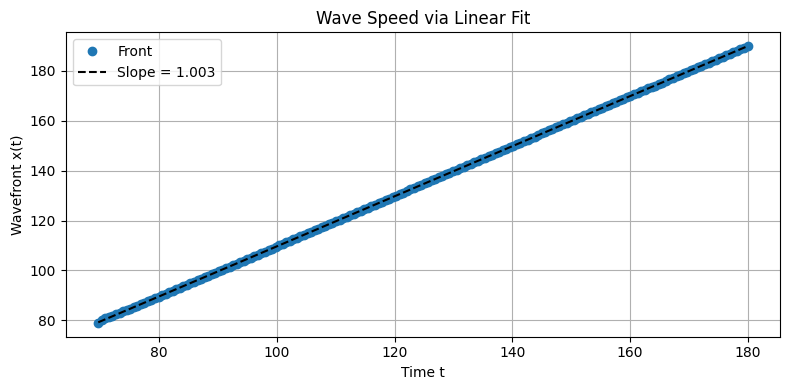

Estimated speed = 1.0033, R² = 1.0000


(np.float64(1.0032844906127814),
 np.float64(9.322313926210441),
 np.float64(0.9999955592032185))

In [16]:
model_05_01 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 0.01,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_05_01.solve()
model_05_01.estimate_wave_speed(plot=True)
model_05_01.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)
model_05_01.estimate_wave_speed(plot=True,target='M', threshold=0.25)

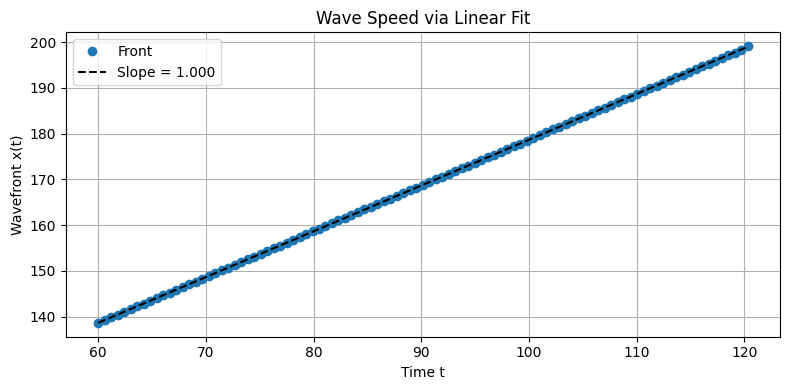

Estimated speed = 1.0002, R² = 1.0000
Estimated speed = 1.0002, R² = 1.0000


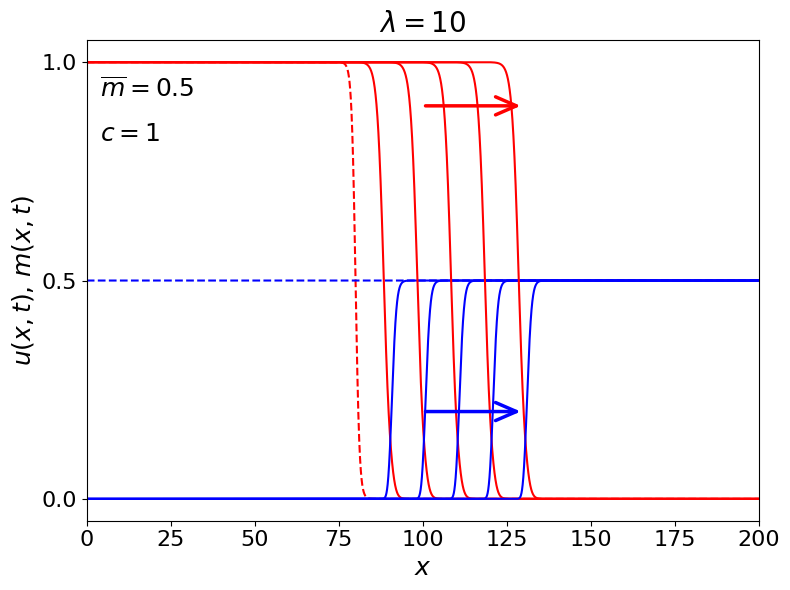

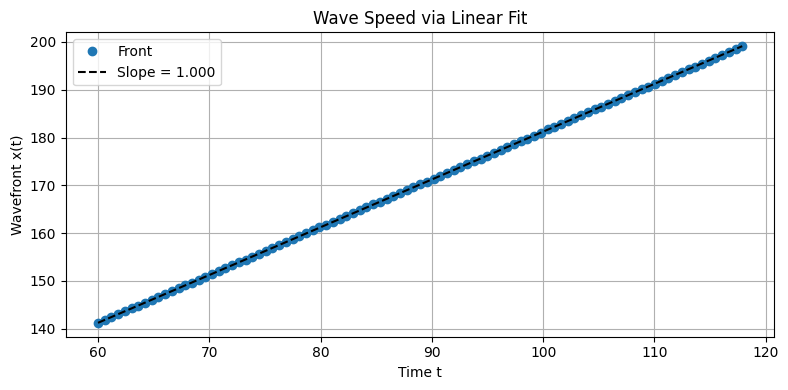

Estimated speed = 0.9999, R² = 1.0000


(np.float64(0.9999037099757669),
 np.float64(81.23604943433492),
 np.float64(0.9999965925709672))

In [18]:
model_05_10 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 10,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_05_10.solve()
model_05_10.estimate_wave_speed(plot=True)
model_05_10.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)
model_05_10.estimate_wave_speed(plot=True,target='M', threshold=0.25)

<h2> M0 = 0.1

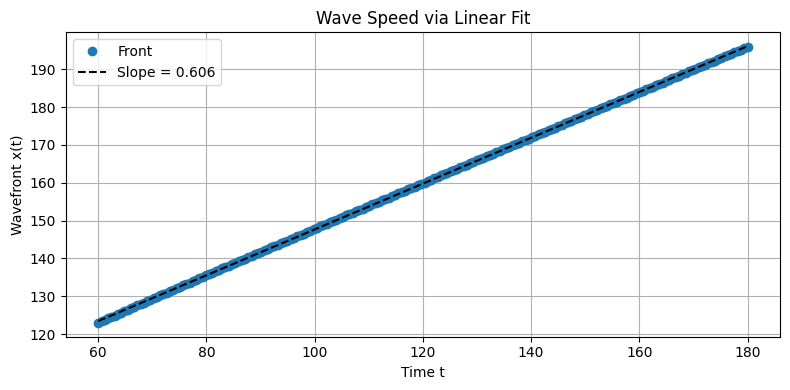

Estimated speed = 0.6055, R² = 1.0000
Estimated speed = 0.6055, R² = 1.0000


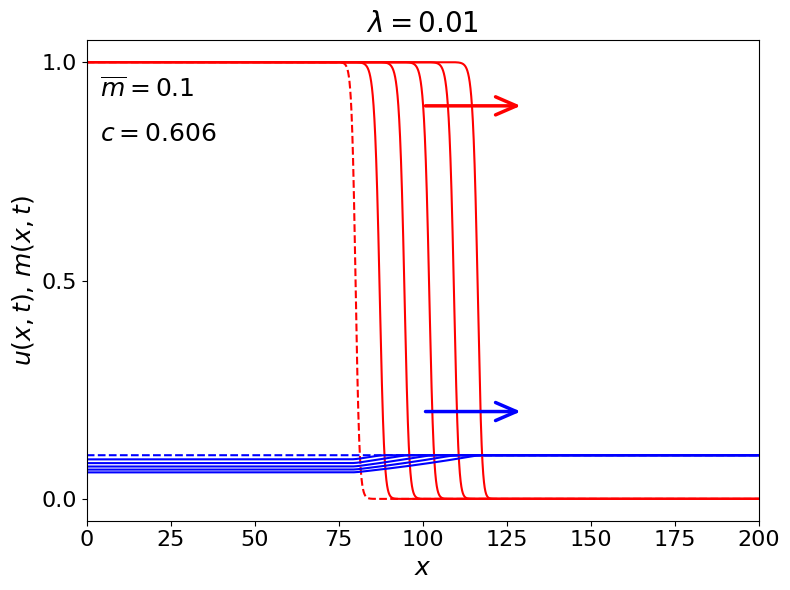

In [6]:
model_01_01 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 0.01, m0 = 0.1,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_01_01.solve()
model_01_01.estimate_wave_speed(plot=True)
model_01_01.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)

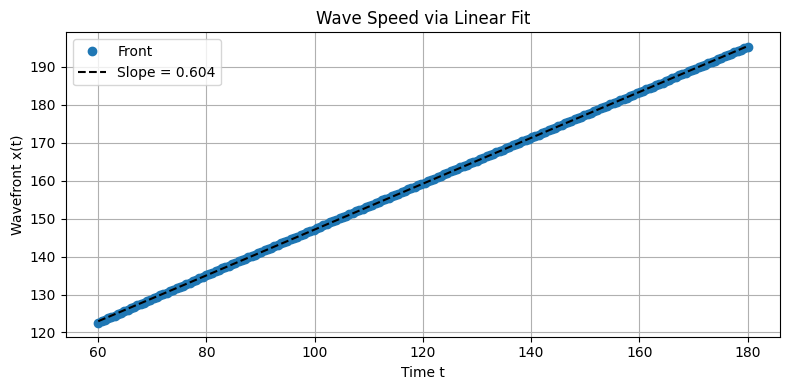

Estimated speed = 0.6044, R² = 1.0000
Estimated speed = 0.6044, R² = 1.0000


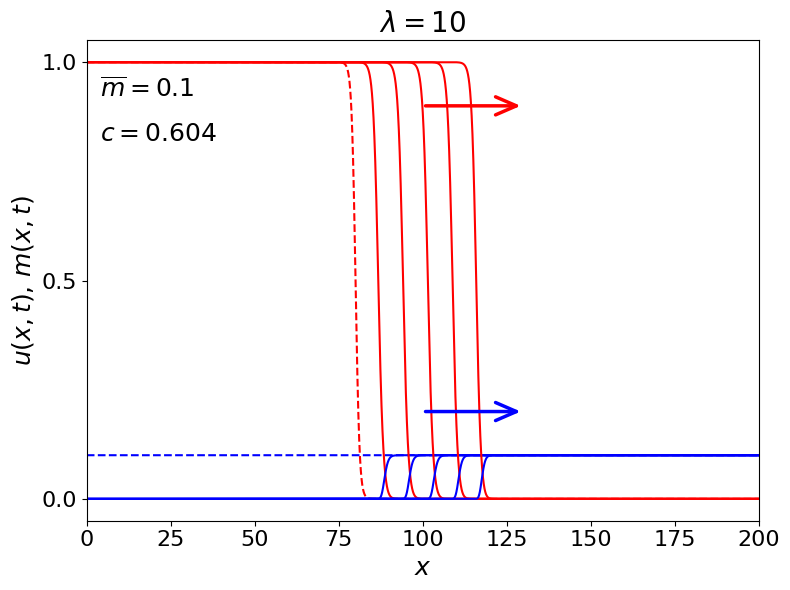

❌ Not enough valid front points.


(None, None, None)

In [19]:
model_01_10 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 10, m0 = 0.1,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_01_10.solve()
model_01_10.estimate_wave_speed(plot=True)
model_01_10.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)
model_01_10.estimate_wave_speed(plot=True,target='M', threshold=0.05)

<h2> M0=0.9

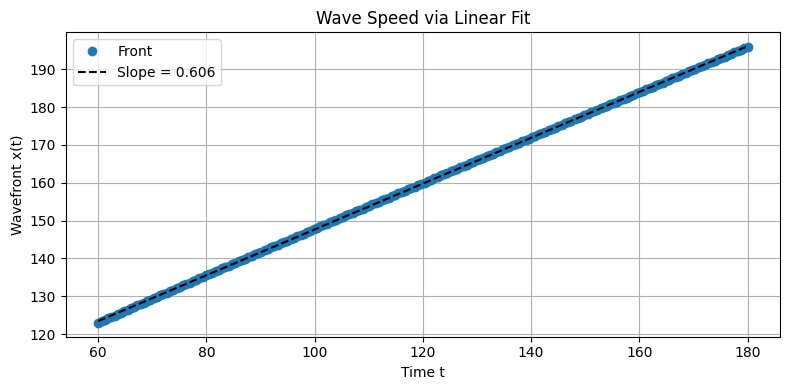

Estimated speed = 0.6055, R² = 1.0000
Estimated speed = 0.6055, R² = 1.0000


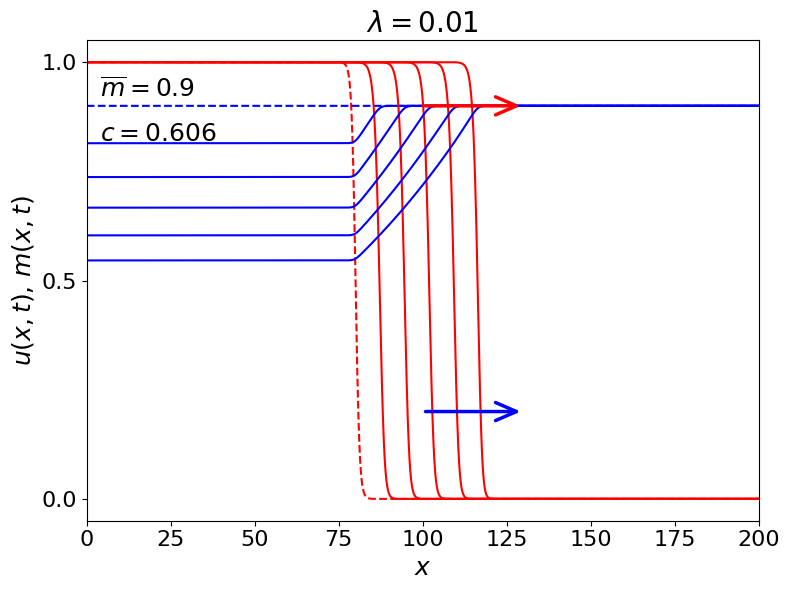

In [8]:
model_01_09 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 0.01, m0 = 0.9,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_01_09.solve()
model_01_09.estimate_wave_speed(plot=True)
model_01_09.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)

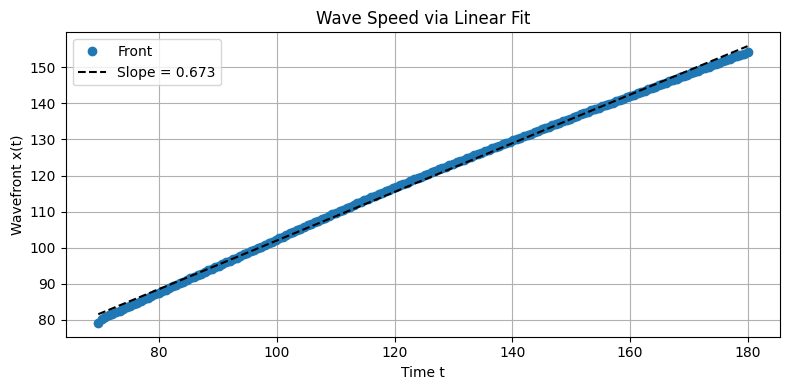

Estimated speed = 0.6735, R² = 0.9982


(np.float64(0.6734570677460207),
 np.float64(34.64588304138289),
 np.float64(0.9982106072846695))

In [14]:
model_01_09.estimate_wave_speed(plot=True,target='M', threshold=0.45)

<h2> M0 = 0.8

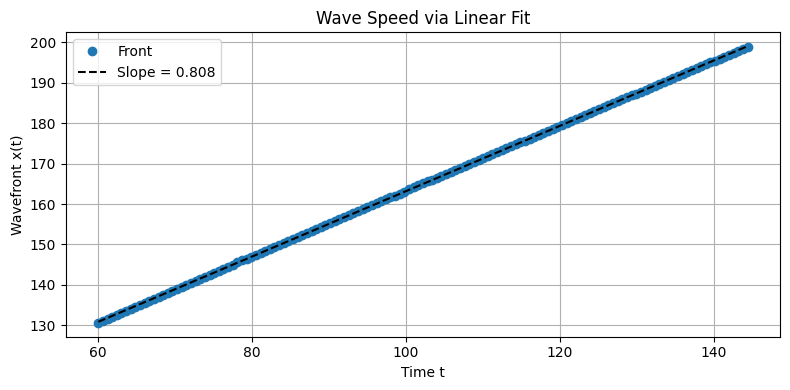

Estimated speed = 0.8078, R² = 1.0000
Estimated speed = 0.8078, R² = 1.0000


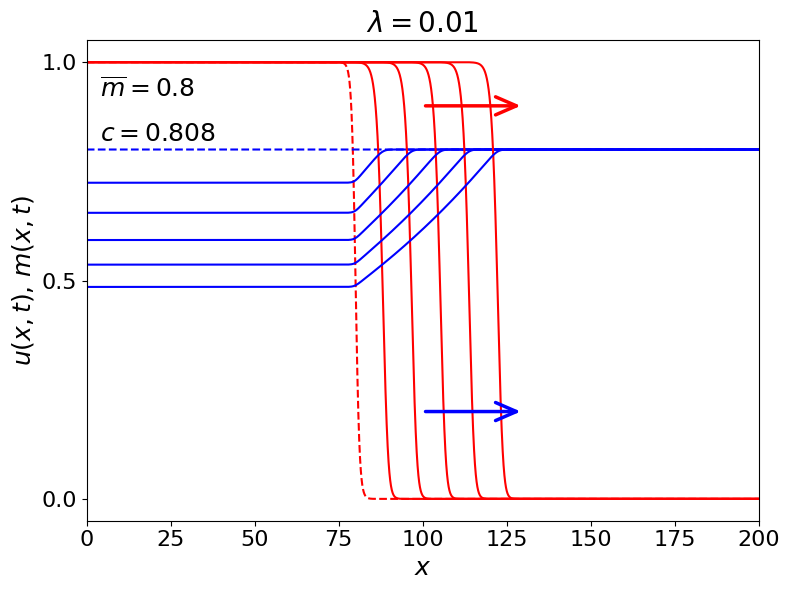

In [9]:
model_01_08 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 0.01, m0 = 0.8,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_01_08.solve()
model_01_08.estimate_wave_speed(plot=True)
model_01_08.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)

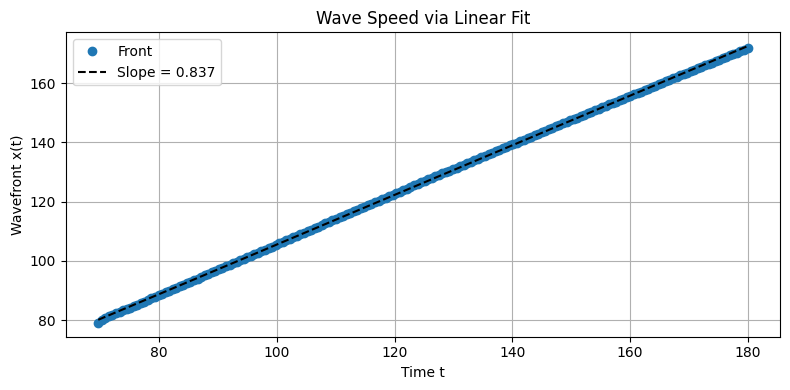

Estimated speed = 0.8367, R² = 0.9999


(np.float64(0.8367075034129507),
 np.float64(21.83859932126019),
 np.float64(0.9998594934062249))

In [15]:
model_01_08.estimate_wave_speed(plot=True,target='M', threshold=0.4)

<h2> Calc Speed for M

In [25]:
# ===== External M-front tools (no class edits required) =====
import numpy as np
from scipy.interpolate import CubicSpline, PchipInterpolator, Akima1DInterpolator, interp1d
from scipy.optimize import root_scalar
from scipy.stats import linregress
import matplotlib.pyplot as plt

def _get_spline(method, x, y):
    if method == 'cubic': return CubicSpline(x, y)
    if method == 'pchip': return PchipInterpolator(x, y)
    if method == 'akima': return Akima1DInterpolator(x, y)
    if method == 'linear': return interp1d(x, y, kind='linear', fill_value="extrapolate")
    raise ValueError(f"Unsupported spline_type: {method}")

def track_m_front_external(model,
                           threshold=None,            # default: model.m0/2
                           band=(0.1, 0.9),
                           spline_type='cubic',
                           t_start=None, t_end=None, num_points=None):
    """
    Exact replica of your local-interpolation tracker, but for m(x,t) externally.
    Returns (t_fronts, x_fronts) as numpy arrays.
    """
    x       = model.x
    t_vec   = model.times
    M_arr   = model.M_arr

    # window + threshold defaults mirror the class style
    if threshold   is None: threshold   = 0.5 * float(model.m0)
    if t_start     is None: t_start     = getattr(model, "t_start", float(t_vec[0]))
    if t_end       is None: t_end       = getattr(model, "t_end",   float(t_vec[-1]))
    if num_points  is None: num_points  = getattr(model, "num_points", 200)

    t_list = np.linspace(t_start, t_end, int(num_points))
    x_fronts, t_fronts = [], []

    for t_target in t_list:
        idx = int(np.argmin(np.abs(t_vec - t_target)))
        u = M_arr[idx]
        mask = (u > band[0]) & (u < band[1])
        if np.sum(mask) < 5:
            continue
        x_local, u_local = x[mask], u[mask]
        sidx = np.argsort(x_local)
        x_local, u_local = x_local[sidx], u_local[sidx]

        spline = _get_spline(spline_type, x_local, u_local)
        crossing_idx = np.where(np.sign(u_local[:-1] - threshold) != np.sign(u_local[1:] - threshold))[0]
        if crossing_idx.size == 0:
            continue
        i = int(crossing_idx[0])
        x_left, x_right = x_local[i], x_local[i + 1]
        try:
            sol = root_scalar(lambda xv: spline(xv) - threshold, bracket=[x_left, x_right])
            if sol.converged:
                x_fronts.append(sol.root)
                t_fronts.append(t_target)
        except Exception:
            # quietly skip failed local solve, exactly like your method
            continue

    return np.asarray(t_fronts, dtype=float), np.asarray(x_fronts, dtype=float)


def estimate_m_speed_external(model,
                              threshold=None,
                              band=(0.1, 0.9),
                              spline_type='cubic',
                              t_start=None, t_end=None, num_points=None,
                              plot=False):
    """
    Exact-style speed fit for m: uses track_m_front_external + linregress.
    Returns (speed, intercept, R2, t_fronts, x_fronts).
    """
    tF, xF = track_m_front_external(
        model,
        threshold=threshold, band=band, spline_type=spline_type,
        t_start=t_start, t_end=t_end, num_points=num_points
    )

    if tF.size < 2:
        print("❌ Not enough valid M-front points.")
        return None, None, None, tF, xF

    slope, intercept, r_value, _, _ = linregress(tF, xF)

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(tF, xF, 'o', label='M-front')
        plt.plot(tF, slope * tF + intercept, 'k--', label=f'Slope = {slope:.3f}')
        plt.xlabel("Time t"); plt.ylabel("M-front x(t)")
        th = threshold if threshold is not None else 0.5 * float(model.m0)
        plt.title(f"M speed via linear fit (threshold={th:.3g})")
        plt.legend(); plt.grid(True); plt.tight_layout(); plt.show()

    return float(slope), float(intercept), float(r_value**2), tF, xF

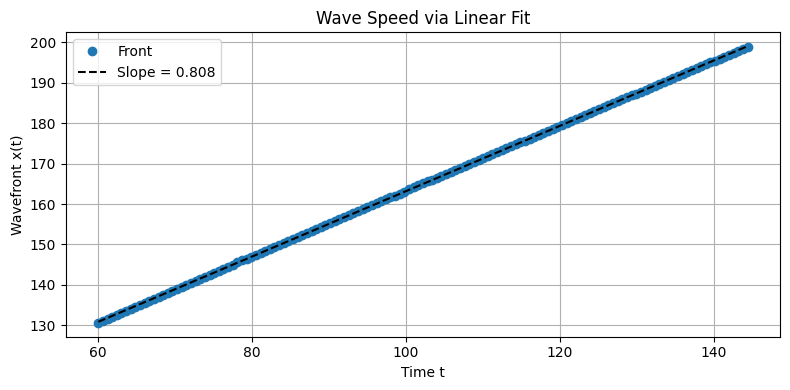

Estimated speed = 0.8078, R² = 1.0000
Estimated speed = 0.8078, R² = 1.0000


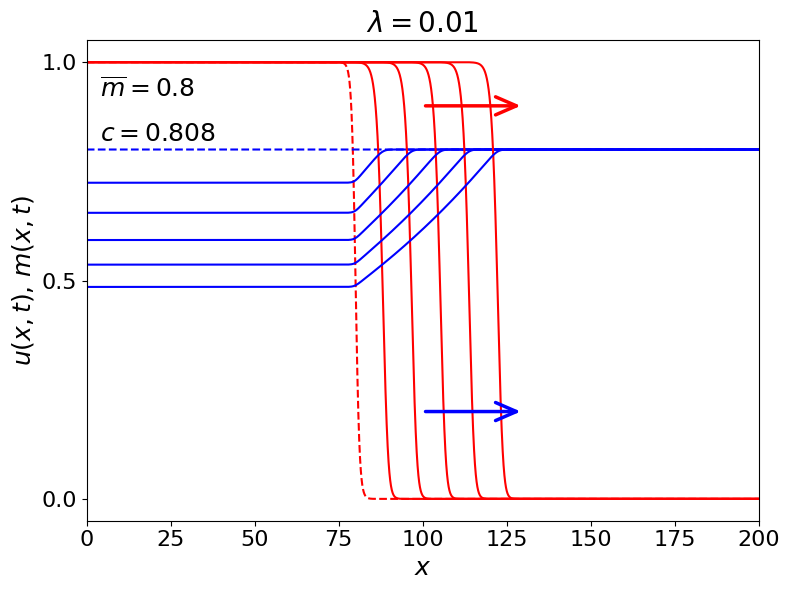

In [21]:
model_01_08 = Dissertation_Plain_1D(
    L=200, N=20001, T=200, dt=0.1, k = 0.01, m0 = 0.8,
    init_type="tanh", steepness=.85, perc=0.4,
    t_start=60, t_end=180, num_points=200
)
model_01_08.solve()
model_01_08.estimate_wave_speed(plot=True)
model_01_08.plot_u_m_with_custom_style([0, 100,200, 300, 400, 500], head_length=1.5, head_width=.65)

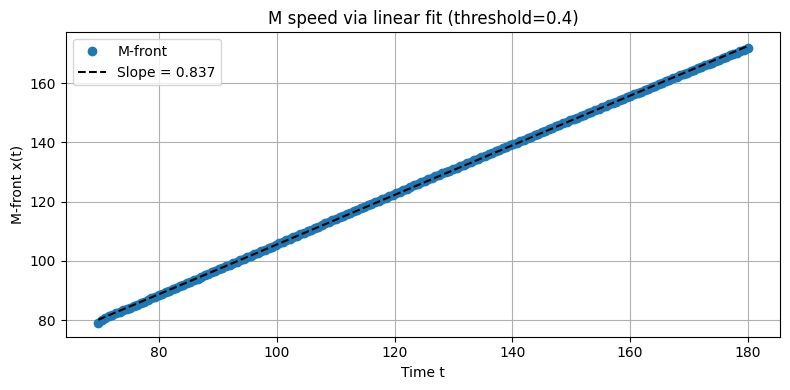

m-speed: 0.8367075034129507 R²: 0.9998594934062249


In [26]:


# Same method as your class, but external and for m:
cM, bM, r2M, tM, xM = estimate_m_speed_external(
    model_01_08,
    threshold=model_01_08.m0/2,         # or any threshold you prefer
    t_start=60, t_end=180,        # independent window for m
    num_points=200,
    spline_type='cubic',
    plot=True
)
print("m-speed:", cM, "R²:", r2M)

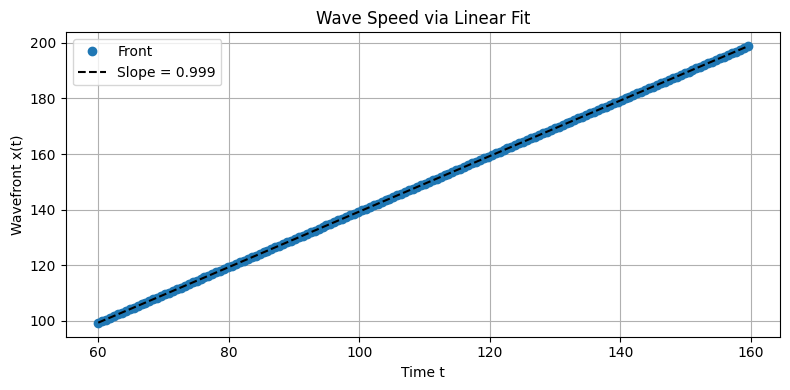

Estimated speed = 0.9986, R² = 1.0000
Estimated speed = 0.9986, R² = 1.0000


IndexError: index 5000 is out of bounds for axis 0 with size 4000

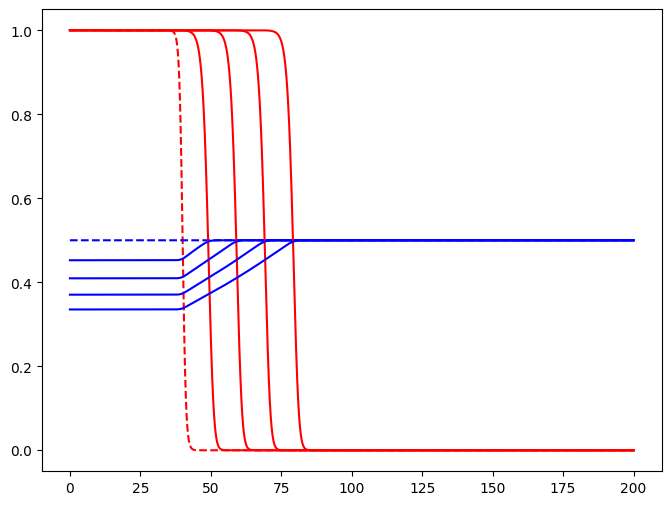

In [12]:
model_01_05 = Dissertation_Plain_1D(
    L=200, N=20001, T=400, dt=0.1, k = 0.01, m0 = 0.5,
    init_type="tanh", steepness=.85, perc=0.2,
    t_start=60, t_end=180, num_points=200
)
model_01_05.solve()
model_01_05.estimate_wave_speed(plot=True)
model_01_05.plot_u_m_with_custom_style([0, 100,200, 300, 400, 5000], head_length=1.5, head_width=.65)

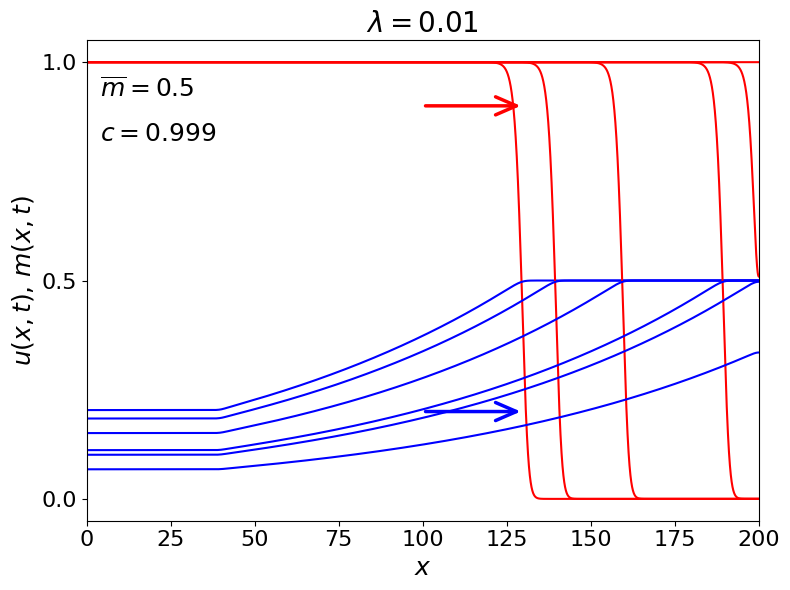

In [22]:
model_01_05.plot_u_m_with_custom_style([900, 1000, 1200, 1500, 1600, 2000], head_length=1.5, head_width=.65)